Librerías

In [ ]:
! apt-get install graphviz
import graphviz

import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import io
import matplotlib.pyplot as plt
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


Cargar y visualizar la dataset

Text(0, 0.5, 'NUMBER OF OBSERVATIONS')

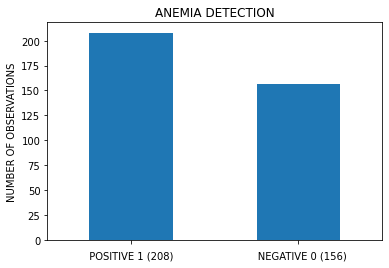

In [ ]:
#Cargar dataset
from google.colab import files 
#uploaded = files.upload()

#Leer dataset
df=pd.read_excel('/content/Colab.xlsx')

#Grafica dataset Anemia Detection TEST POSITIVE (1) vs TEST NEGATIVE (0)
count_classes = pd.value_counts(df['TEST'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS = ""
plt.xticks(range(2), LABELS)
plt.title("ANEMIA DETECTION")
plt.xlabel("  POSITIVE 1 (208)                           NEGATIVE 0 (156)")
plt.ylabel("NUMBER OF OBSERVATIONS")

Tratamiento de la dataset

In [ ]:
#Dividir los datos en atributos y etiquetas
"""
X = df.iloc[:, :-1].values
#print(X)
y = df.iloc[:, 11].values
#print(y)
"""
X = df.drop('TEST', axis=1)
print(X)
y = df['TEST']
print(y)

#Partitioning entrenamiento/prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70)

#Escalado de caracteristicas - algoritmo de descenso gradiente
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

     Age  Sex   RBC   PCV   MCV   MCH  MCHC   RDW    TLC  PLT/mm3   HGB
0     28    0  5.66  34.0  60.1  17.0  28.2  20.0  11.10    128.3   9.6
1     41    0  4.78  44.5  93.1  28.9  31.0  13.0   7.02    419.0  13.8
2     40    1  4.65  41.6  89.5  28.8  32.2  13.0   8.09    325.0  13.4
3     76    0  4.24  36.7  86.6  26.7  30.8  14.9  13.41    264.0  11.3
4     20    1  4.14  36.9  89.1  27.8  31.2  13.2   4.75    196.0  11.5
..   ...  ...   ...   ...   ...   ...   ...   ...    ...      ...   ...
359   17    0  4.86  39.2  80.7  27.7  34.4  13.4   4.40    180.0  13.5
360   51    0  4.85  35.2  91.7  31.0  33.8  13.3   5.60    215.0  15.0
361   21    1  4.47  39.7  88.7  29.3  33.0  13.5   9.20    329.0  13.1
362   35    1  4.75  36.2  86.7  27.9  32.1  13.5   6.48    174.0  13.2
363   26    0  4.95  44.4  89.7  30.6  34.2  12.3   8.80    279.0  15.2

[364 rows x 11 columns]
0      1
1      0
2      0
3      1
4      1
      ..
359    0
360    0
361    0
362    0
363    0
Name: TEST, 

K Nearest Neighbor


********************* K NEAREST NEIGHBOR *********************

	   CONFUSION MATRIX



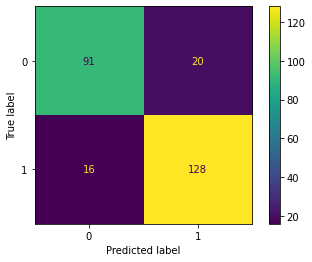


			CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       111
           1       0.86      0.89      0.88       144

    accuracy                           0.86       255
   macro avg       0.86      0.85      0.86       255
weighted avg       0.86      0.86      0.86       255



Text(0, 0.5, 'Error medio')

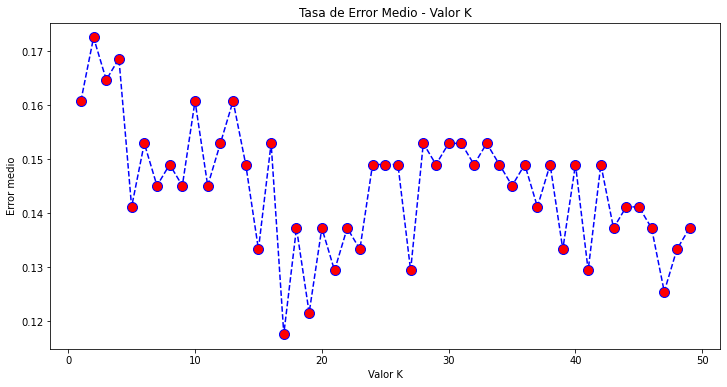

In [ ]:
#Entrenamiento y predicciones
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Evaluar el algoritmo
print("\n********************* K NEAREST NEIGHBOR *********************")
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("\n\t   CONFUSION MATRIX\n")
plt.show()

print("\n\t\t\tCLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))

#Comparacion de la tasa de error con el valor K
error = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error Medio - Valor K')
plt.xlabel('Valor K')
plt.ylabel('Error medio')

Decision Tree Classifier




********************* DECISION TREE CLASSIFIER *********************

	   CONFUSION MATRIX



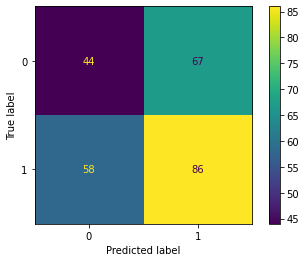


			CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       107
           1       0.97      1.00      0.98       148

    accuracy                           0.98       255
   macro avg       0.98      0.98      0.98       255
weighted avg       0.98      0.98      0.98       255



In [ ]:
#Entrenando y haciendo predicciones
from sklearn.tree import export_graphviz
df1 = df
features = df1.drop(["TEST"], axis=1)
X = np.array(features)
y = np.array(df1["TEST"])
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.70)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)

#Evaluar el algoritmo
print("\n********************* DECISION TREE CLASSIFIER *********************")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("\n\t   CONFUSION MATRIX\n")
plt.show()

print("\n\t\t\tCLASSIFICATION REPORT\n")
print(classification_report(y_val, y_pred))

tree.tree_.max_depth
validation_prediction = tree.predict(X_val)
training_prediction = tree.predict(X_train)

Graficando Decision Tree Classifier

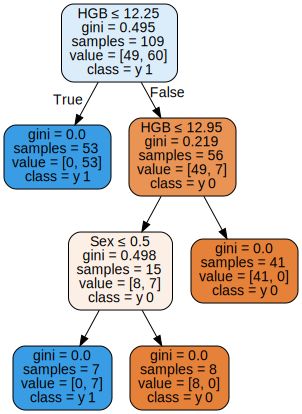

In [ ]:
feature_names = features.columns

dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

Naive Bayes


********************* NAIVE BAYES *********************

	   CONFUSION MATRIX



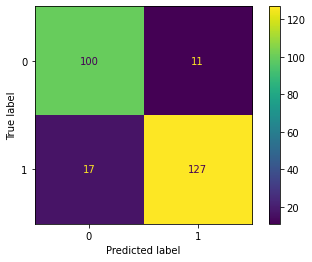


			CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       111
           1       0.92      0.88      0.90       144

    accuracy                           0.89       255
   macro avg       0.89      0.89      0.89       255
weighted avg       0.89      0.89      0.89       255



In [ ]:
#Partitioning entrenamiento/prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70)

#Entrenando y haciendo predicciones
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_predNB = classifier.predict(X_test)

#Evaluar el algoritmo
print("\n********************* NAIVE BAYES *********************")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predNB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("\n\t   CONFUSION MATRIX\n")
plt.show()

print("\n\t\t\tCLASSIFICATION REPORT\n")
print(classification_report(y_test, y_predNB))

Neural Network


********************* NEURAL NETWORK *********************

	   CONFUSION MATRIX



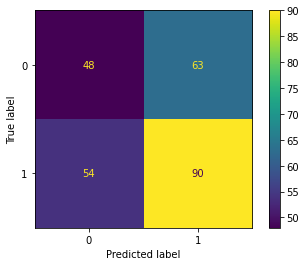


			CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       111
           1       0.76      0.74      0.75       144

    accuracy                           0.72       255
   macro avg       0.71      0.71      0.71       255
weighted avg       0.72      0.72      0.72       255



In [ ]:
#Entrenando y haciendo predicciones
from sklearn.neural_network import MLPClassifier
#Creamos tres capas de 15 nodos cada una
#MLPClassifier especifica el número de iteraciones que ejecutará la red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,15, 15, 15, 15, 15, 15, 15, 15, 15), max_iter=10000)
mlp.fit(X_train, y_train.ravel())
y_predNN = mlp.predict(X_test)

#Evaluar el algoritmo
print("\n********************* NEURAL NETWORK *********************")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("\n\t   CONFUSION MATRIX\n")
plt.show()

print("\n\t\t\tCLASSIFICATION REPORT\n")
print(classification_report(y_test,y_predNN))